In [1]:
#this line is required to display charts within the notebook
%matplotlib inline

#imports
import pandas as pd

#loading the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
#view a synopsis of the data

train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [3]:
#view datatypes of the data

train.dtypes

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [4]:
#view first 5 rows of the data

train.head(5)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


# TODO

* Remove null values
* Generate some visualizations

In [5]:
# Convert date string to Pandas datetime format 

for i, datestring in enumerate(train.ix[:, 'DateTime']):
    train.ix[i, 'DateTime'] = pd.to_datetime(datestring)

# Check if the format was updated

print train['DateTime'][:5]
print type(train['DateTime'][0])

0    2014-02-12 18:22:00
1    2013-10-13 12:44:00
2    2015-01-31 12:28:00
3    2014-07-11 19:09:00
4    2013-11-15 12:52:00
Name: DateTime, dtype: object
<class 'pandas.tslib.Timestamp'>


In [13]:
# Slice dataframe where OutcomeSubType is NaN
outcomesubtype_nans = train[train['OutcomeSubtype'].isnull()]

# Find the OutcomeType values from this slice
unq_subtypes = outcomesubtype_nans['OutcomeType'].unique()

# Check number of non NaNs for each of above values in original dataset
# If 0, the OutcomeSubtype is not important. Why?
print 'Non NaNs in each category of OutcomeType where OutcomeSubtype = NaN'
for ost_nan in unq_subtypes:
    # Select OutcomeSubtype column from dataframe where OutcomeType == ost_nan
    ost_nan_subtypes = train[train['OutcomeType'] == ost_nan]['OutcomeSubtype']
    print ost_nan + ' : ' + str(ost_nan_subtypes.count())
    
del ost_nan_subtypes
del outcomesubtype_nans

Non NaNs in each category of OutcomeType where OutcomeSubtype = NaN
Adoption : 1966
Died : 181
Euthanasia : 1554
Transfer : 9416


In [14]:
# Replace Return_to_owner OutcomeSubtypes as RTO, loop through the column to save space
for i, notimp in enumerate(train.ix[:, 'OutcomeType']):
    if train.ix[i, 'OutcomeType'] == 'Return_to_owner':
        train.ix[i, 'OutcomeSubtype'] = 'RTO'

In [15]:
# Find the categories of AnimalType
print train['AnimalType'].unique()

['Dog' 'Cat']


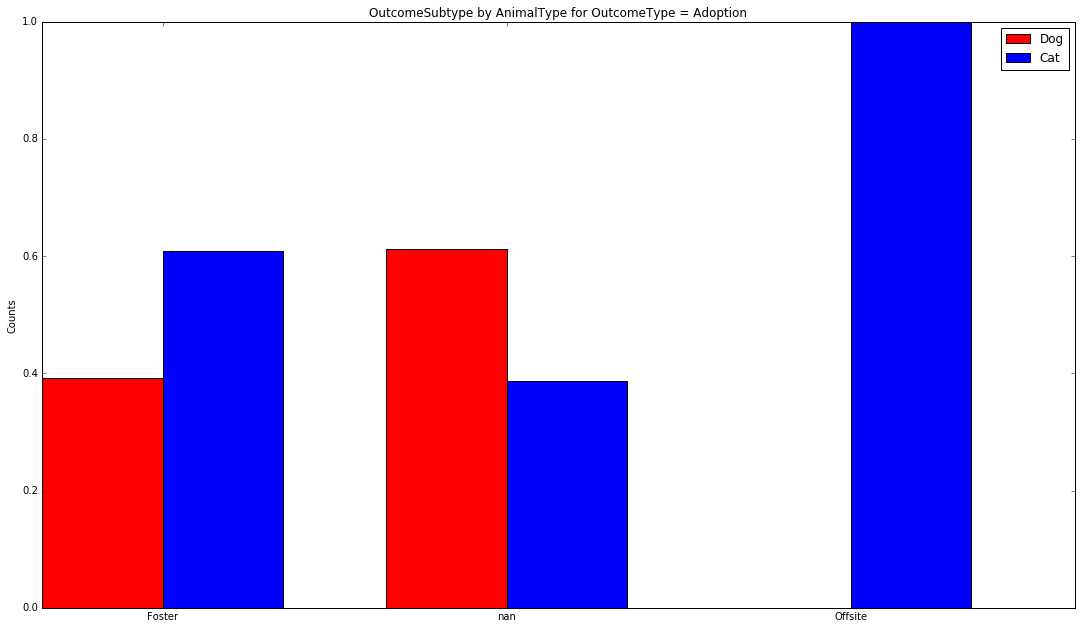

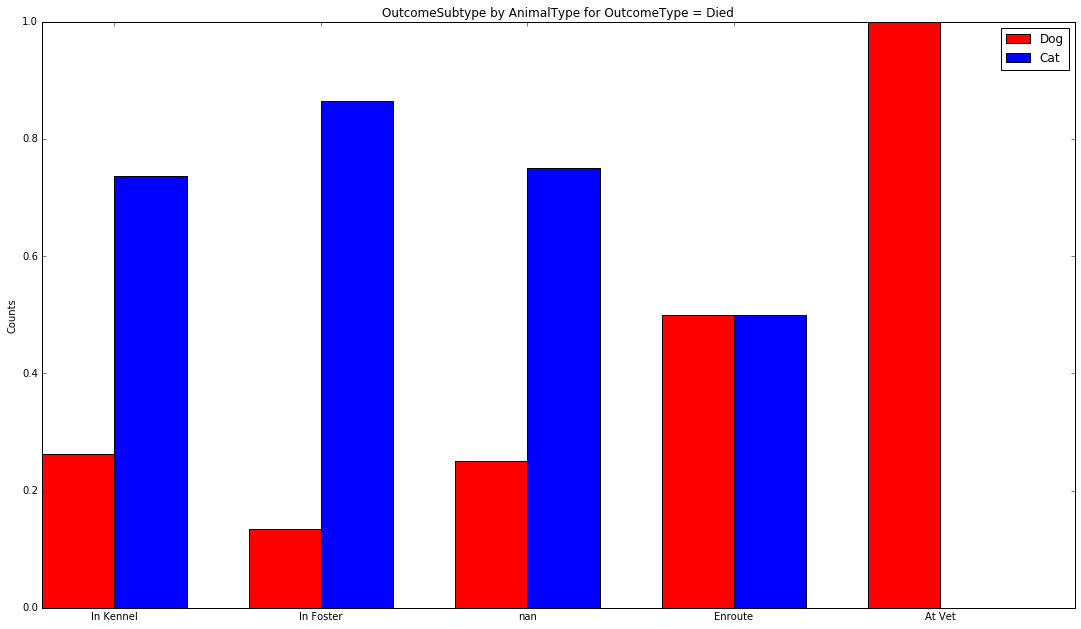

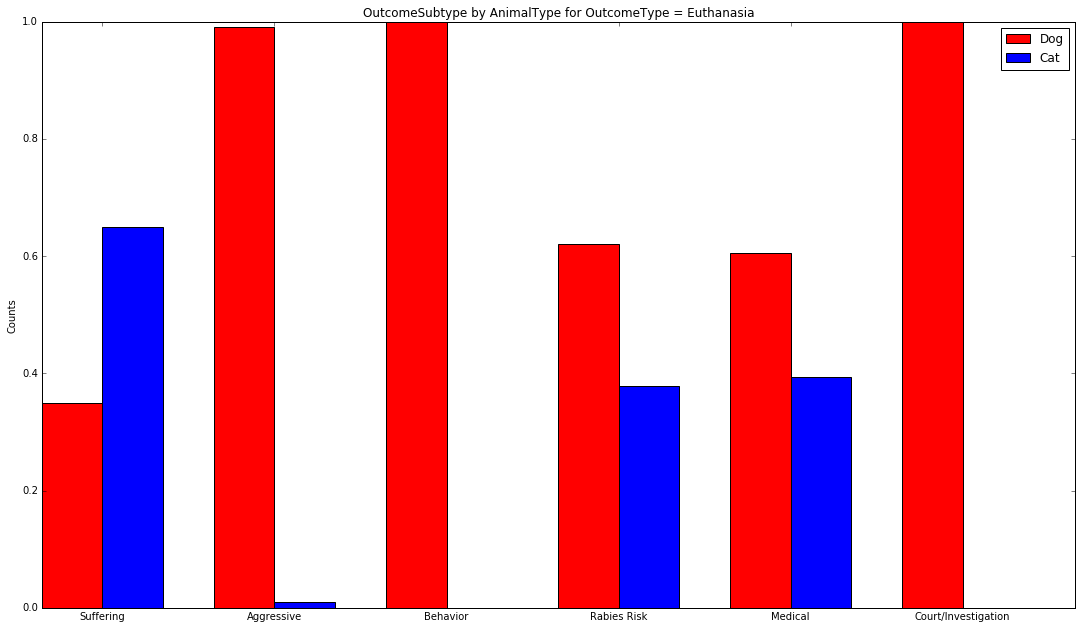

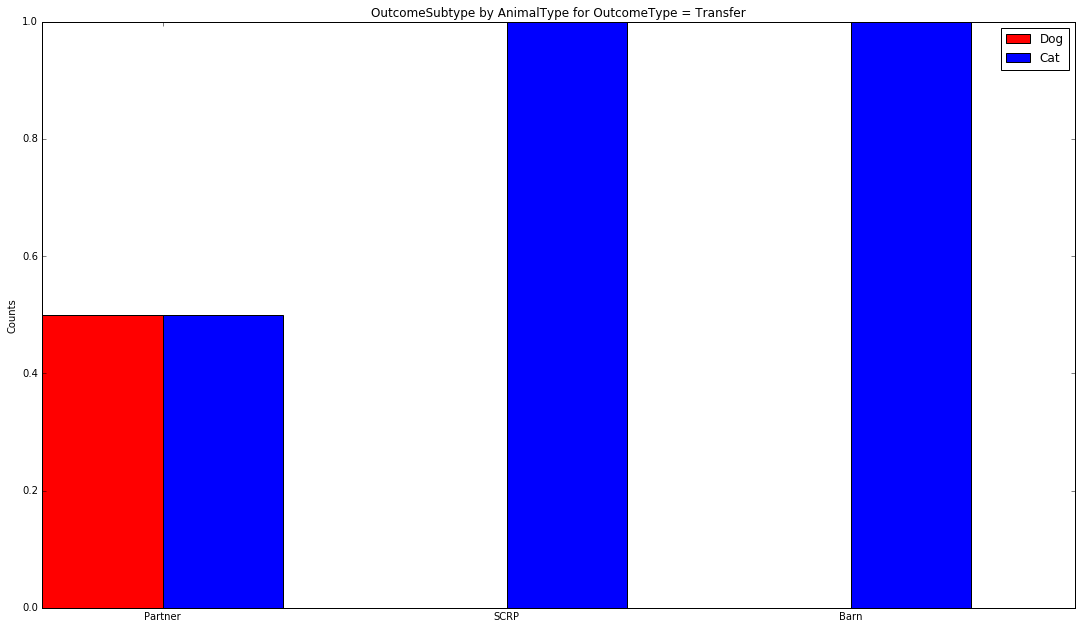

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Remove Return_to_owner from unq_subtypes

for ost_nan in unq_subtypes:
    # Create dataframe where OutcomeType = Adoption/Died/Euthanasia/Transfer
    oc_type_df = train[train['OutcomeType'] == ost_nan]

    # Find the OutcomeSubtype categories for this dataframe
    subtypes = oc_type_df['OutcomeSubtype'].unique()

    N = len(subtypes)

    # Create two empty list to store counts
    dog_counts = list()
    cat_counts = list()

    for st in subtypes:
        if str(st) == 'nan':
            continue
        dog_counts.append(oc_type_df[(oc_type_df['AnimalType'] == 'Dog') & (oc_type_df['OutcomeSubtype'] == st)].shape[0])
        cat_counts.append(oc_type_df[(oc_type_df['AnimalType'] == 'Cat') & (oc_type_df['OutcomeSubtype'] == st)].shape[0])
        
    # Normalize the counts
    for i in range(len(dog_counts)):
        a, b = dog_counts[i], cat_counts[i]
        dog_counts[i] = a / ((a + b) * 1.0)
        cat_counts[i] = b / ((a + b) * 1.0)

    dog_counts = tuple(dog_counts)
    cat_counts = tuple(cat_counts)
    
    ind = np.arange(N - 1)
    width = 0.35

    # Plot the bar graphs for dog and cat counts for different subtypes
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    rects1 = ax.bar(ind, dog_counts, width, color = 'r')
    rects2 = ax.bar(ind + width, cat_counts, width, color = 'b')
    ax.set_ylabel('Counts')
    ax.set_title('OutcomeSubtype by AnimalType for OutcomeType = ' + ost_nan)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(tuple(subtypes))
    ax.legend((rects1[0], rects2[0]), ('Dog', 'Cat'))
    plt.show()

In [17]:
# Reusing code from previous cell

import numpy as np
import matplotlib.pyplot as plt

# Store subtype distribution for dog/cat for each OutcomeType in o_type_dist
o_type_dist = dict()

for ost_nan in unq_subtypes:
    # Create dataframe where OutcomeType = Adoption/Died/Euthanasia/Transfer
    oc_type_df = train[train['OutcomeType'] == ost_nan]

    # Find the OutcomeSubtype categories for this dataframe
    subtypes = oc_type_df['OutcomeSubtype'].unique()

    N = len(subtypes)

    # Create two empty list to store counts
    dog_counts = list()
    cat_counts = list()

    tmp_indices = list()
    for st in subtypes:
        if str(st) == 'nan':
            continue
        dog_counts.append(oc_type_df[(oc_type_df['AnimalType'] == 'Dog') & (oc_type_df['OutcomeSubtype'] == st)].shape[0])
        cat_counts.append(oc_type_df[(oc_type_df['AnimalType'] == 'Cat') & (oc_type_df['OutcomeSubtype'] == st)].shape[0])
        tmp_indices.append(st)
    
    # Create temporary dataframe for probability reference cat/dog with OutcomeSubtype as indices
    o_type_dist[ost_nan] = pd.DataFrame({'Dog' : dog_counts, 'Cat' : cat_counts}, index = tmp_indices).transpose()

{'Adoption':      Foster  Offsite  Barn
Cat    1095       64     1
Dog     705      101     0,
 'Died':      In Kennel  In Foster  Enroute  At Vet  In Surgery
Cat         84         45        6       2           0
Dog         30          7        2       2           3,
 'Euthanasia':      Suffering  Aggressive  Behavior  Rabies Risk  Medical  \
Cat        652           3         0           28       26   
Dog        350         317        86           46       40   

     Court/Investigation  
Cat                    0  
Dog                    6  ,
 'Transfer':      Partner  SCRP  Barn
Cat     3905  1599     1
Dog     3911     0     0}


In [49]:
from IPython.display import display
for key in o_type_dist:
    print key
    display(o_type_dist[key])
    print '\n\n'

Transfer


,Partner,SCRP,Barn
Cat,3905,1599,1
Dog,3911,0,0





Adoption


,Foster,Offsite,Barn
Cat,1095,64,1
Dog,705,101,0





Died


,In Kennel,In Foster,Enroute,At Vet,In Surgery
Cat,84,45,6,2,0
Dog,30,7,2,2,3





Euthanasia


,Suffering,Aggressive,Behavior,Rabies Risk,Medical,Court/Investigation
Cat,652,3,0,28,26,0
Dog,350,317,86,46,40,6


In [25]:
# Get a roll of dice of size N where pval[j] = probability of getting face j
def get_toss(pvals):
    ind = np.where(np.random.multinomial(1,pvals))[0][0]
    return ind

In [30]:
# Normalize a list to a percentage, other words, probability
def normalize(counts_list):
    retval = []
    for count in counts_list:
        retval.append(count / (sum(counts_list) * 1.0))
    return retval

In [34]:
# Replace each NaN in OutcomeSubtype with a probability distributed (o_type_dist)
# for the AnimalType and OutcomeType
for i, notimp in enumerate(train.ix[:, 'AnimalID']):
    if str(train.ix[i, 'OutcomeSubtype']) == 'nan':
        tmp_df = o_type_dist[train.ix[i, 'OutcomeType']]
        counts_list = list(tmp_df.ix[train.ix[i, 'AnimalType']])
        train.ix[i, 'OutcomeSubtype'] = list(tmp_df.columns)[get_toss(normalize(counts_list))]

In [35]:
train.head(100)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,RTO,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,Foster,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [36]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,26729,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,17,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Foster,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,9754,15595,9779,3969,8810,2824


In [39]:
for i, notimp in enumerate(train.ix[:, 'AnimalID']):
    if str(train.ix[i, 'Name']) == 'nan':
        train.ix[i, 'Name'] = 'Some Doe'

In [40]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,26729,26729,26729,26729,26729,26728,26711,26729,26729
unique,26729,6375,22918,5,17,2,5,44,1380,366
top,A705677,Some Doe,2015-08-11 00:00:00,Adoption,Foster,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,7691,19,10769,9754,15595,9779,3969,8810,2824
